In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [ ]:
drive.mount('/content/drive')
drive_path = "/content/drive/MyDrive/Weld_Data.xlsx"
df1 = pd.read_excel(drive_path)
df1.columns = df1.iloc[0]

Mounted at /content/drive


## **Correlation heatmap and scatterplots**

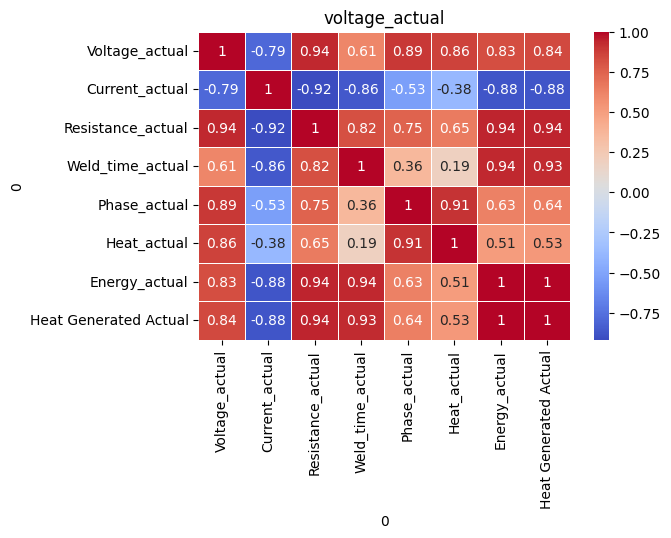

In [ ]:
selected_columns = ['Voltage_actual', 'Current_actual', 'Resistance_actual', 'Weld_time_actual', 'Phase_actual', 'Heat_actual', 'Energy_actual','Heat Generated Actual']
df = df1[selected_columns]
df = df.apply(pd.to_numeric, errors='coerce', downcast='integer')

correlation_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('voltage_actual')
plt.show()

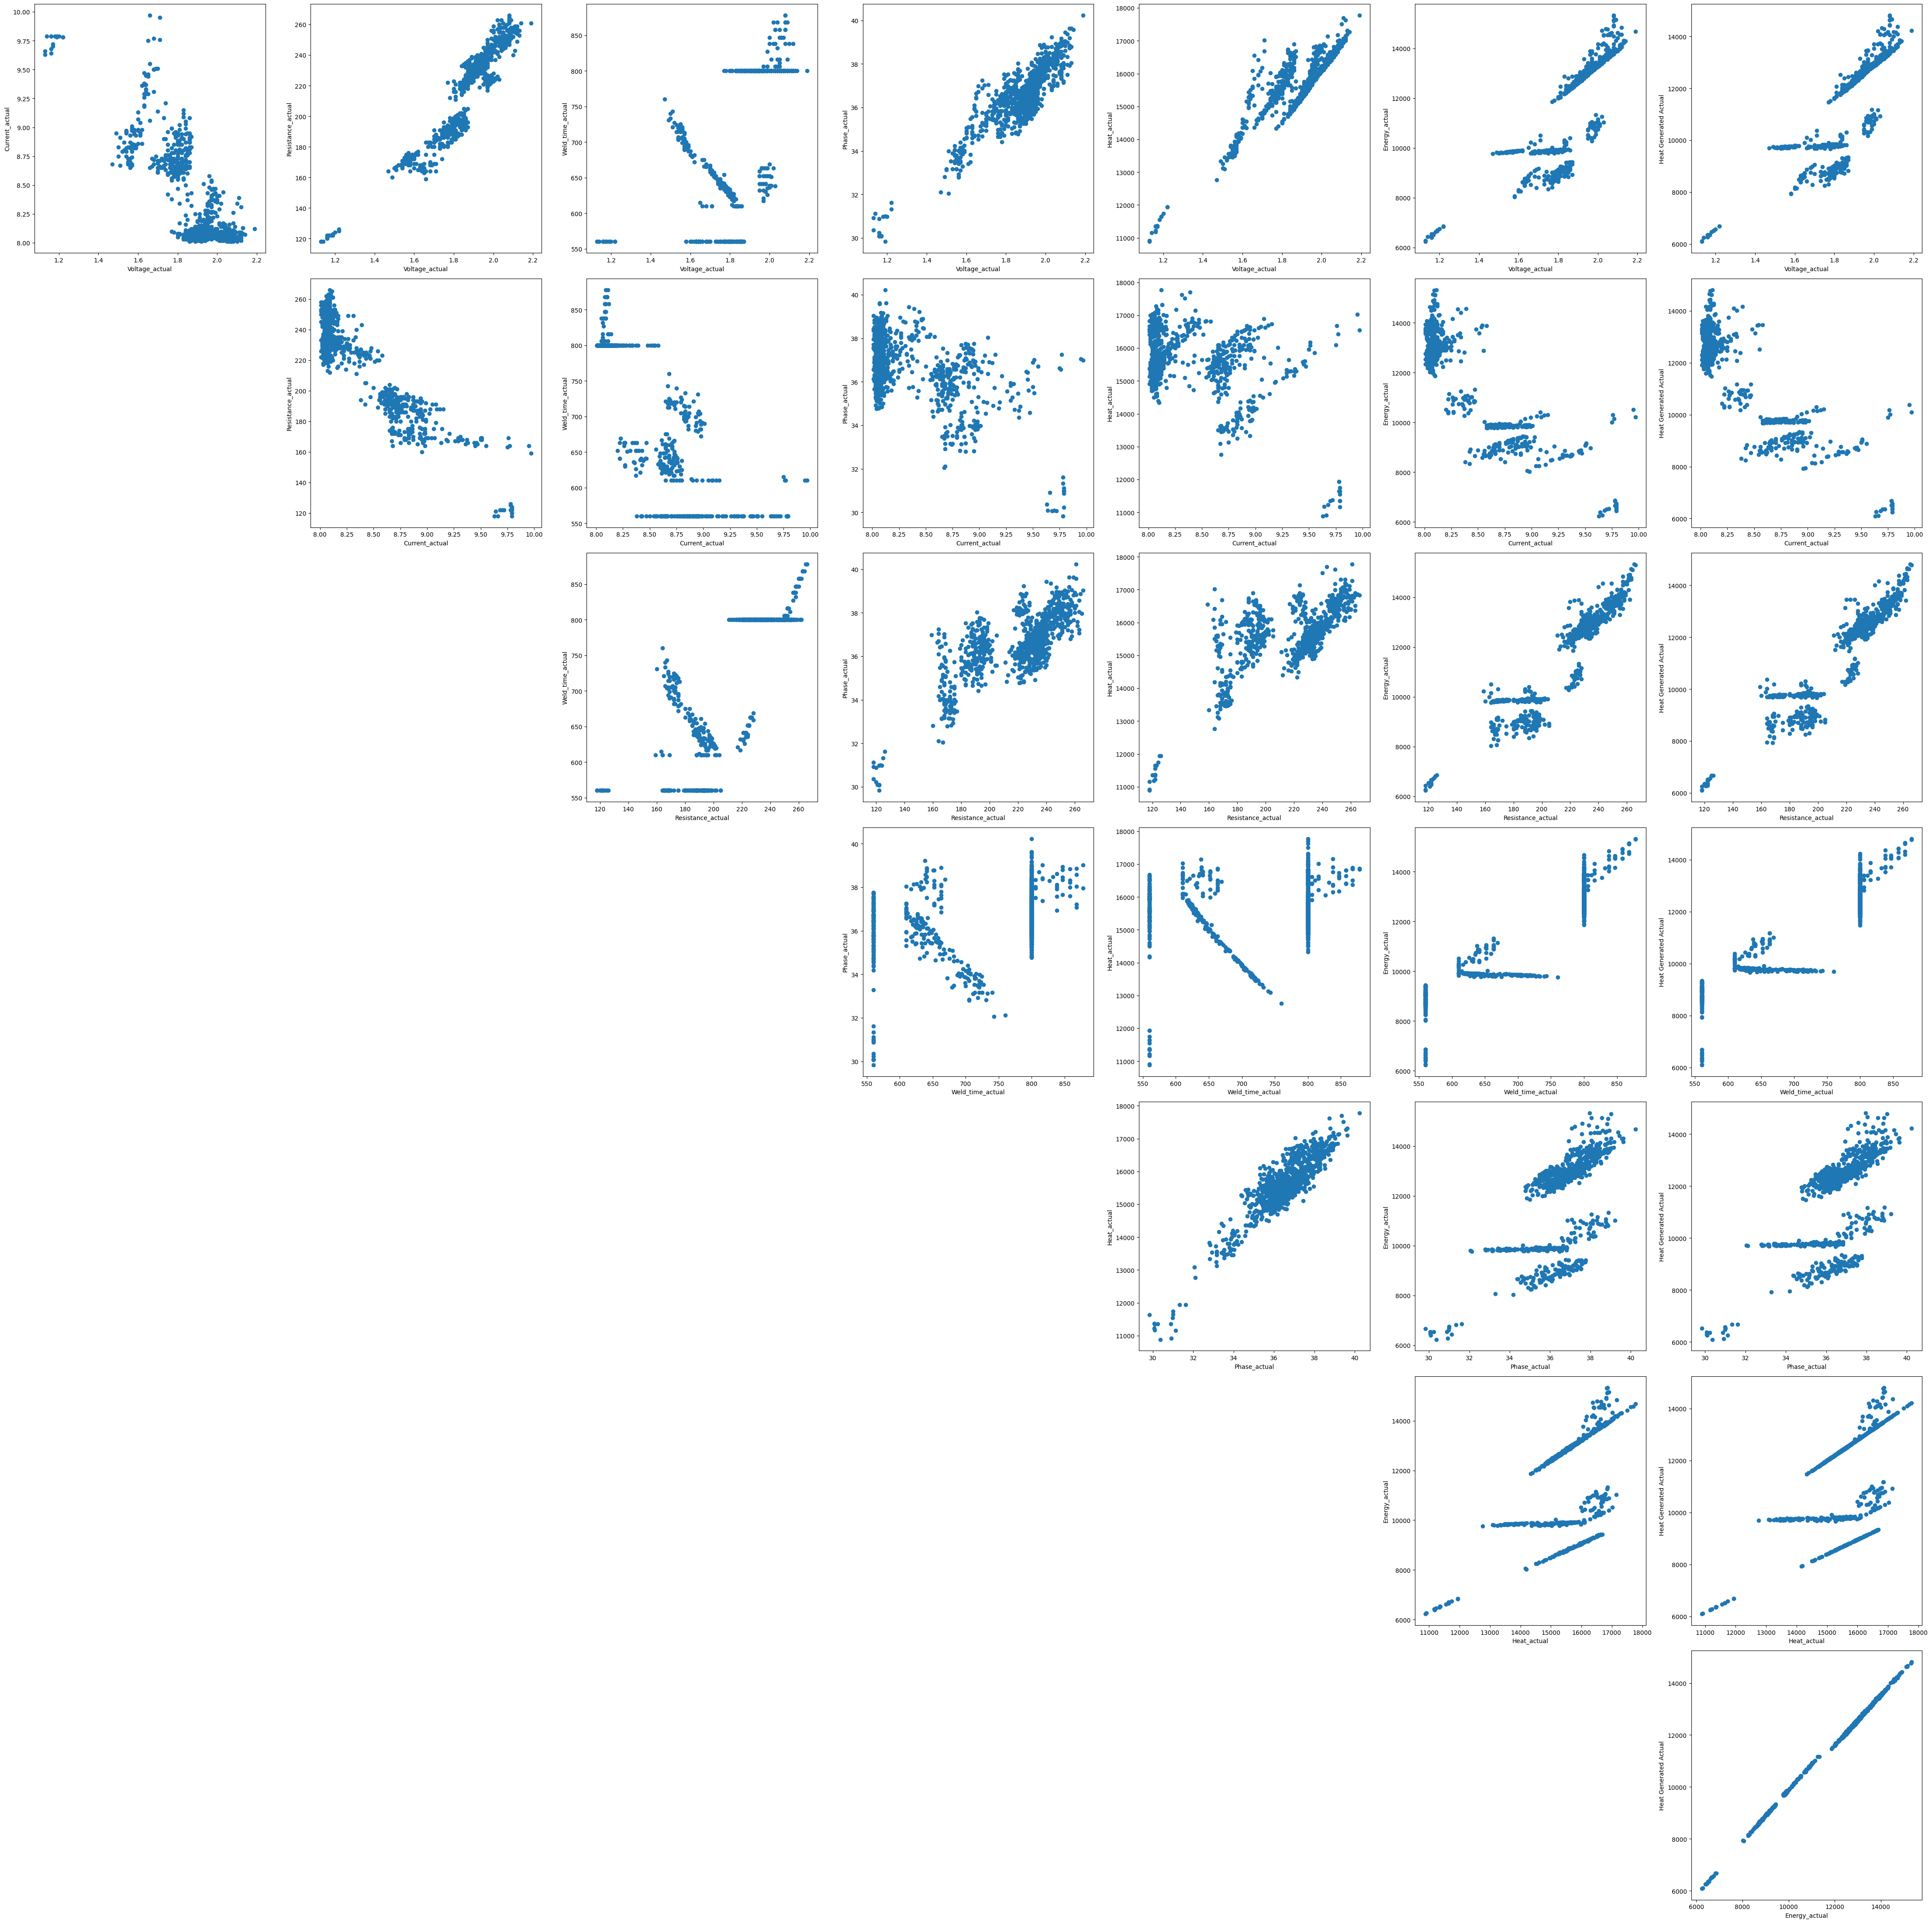

In [ ]:
columns = df.columns
plt.figure(figsize=(50, 50))

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        plt.subplot(len(columns), len(columns), i * len(columns) + j + 1)
        plt.scatter(df[columns[i]], df[columns[j]])
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])

plt.tight_layout()
plt.show()

# **Variance and standard deviation**

In [ ]:
voltage = df['Voltage_actual']
current = df['Current_actual']
resistance = df['Resistance_actual']
weld_time = df['Weld_time_actual']
heat_gen = df['Heat_actual']
var={'voltage_var':voltage.var(),'current_var':current.var(),'resistance_var':resistance.var(),'weld_time_var':weld_time.var(),'heat gen_var':heat_gen.var()}
std={'voltage_std':voltage.std(),'current_std':current.std(),'resistance_std':resistance.std(),'weld_time_std':weld_time.std(),'heat gen_std':heat_gen.std()}
mean={'voltage_mean':voltage.mean(),'current_std':current.mean(),'resistance_std':resistance.mean(),'weld_time_std':weld_time.mean(),'heat gen_std':heat_gen.mean()}
print(var)
print(std)
print(mean)

{'voltage_var': 0.02388495605605605, 'current_var': 0.16633160659340657, 'resistance_var': 782.7350869130869, 'weld_time_var': 8507.053984015984, 'heat gen_var': 802221.2029103856}
{'voltage_std': 0.15454758508645824, 'current_std': 0.40783772090551723, 'resistance_std': 27.977403148131653, 'weld_time_std': 92.23369223887757, 'heat gen_std': 895.6680204799017}
{'voltage_mean': 1.8776700000000002, 'current_std': 8.320439560439558, 'resistance_std': 220.0889110889111, 'weld_time_std': 743.003996003996, 'heat gen_std': 15573.27869130869}


# **Plotting column data and its difference**

In [ ]:
subset_df = df.iloc[0:1000]
column = 'Heat_actual'

trace1 = go.Scatter(x=subset_df.index, y=subset_df[column], mode='lines+markers', name=column, line=dict(color='blue', width=1))  # Set width to 1
layout1 = go.Layout(
    title='Current_actual Over Records',
    xaxis=dict(title='Record Number'),
    yaxis=dict(title='Value')
)
fig1 = go.Figure(data=[trace1], layout=layout1)

percentage_variation = ((subset_df[column] - subset_df[column].shift(1)))
trace2 = go.Scatter(x=subset_df.index, y=percentage_variation, mode='lines+markers', name='Variation', line=dict(color='green', width=1))  # Set width to 1
layout2 = go.Layout(
    title='Variation Over Records',
    xaxis=dict(title='Record Number'),
    yaxis=dict(title='Variation')
)
fig2 = go.Figure(data=[trace2], layout=layout2)

fig = make_subplots(rows=2, cols=1, subplot_titles=(column+' Over Records', 'Variation Over Records'))
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=2, col=1)
fig.update_layout(height=800, width=1700)
fig.show()



# **FFT's of V,R,I and weld time**

# **Finding out Anomalies and plotting them**

In [ ]:
subset_df = df.iloc[0:1000]

def anomalies(df,column_name,x):
  data = df[column_name]
  Q1 = data.quantile(x)
  Q3 = data.quantile(1-x)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(data < lower_bound) | (data > upper_bound)]
  return outliers.index.tolist()

print(anomalies(subset_df, 'Resistance_actual', 0.25))
print(anomalies(subset_df, 'Current_actual', 0.25))
print(anomalies(subset_df, 'Voltage_actual', 0.14))
print(anomalies(subset_df, 'Heat_actual', 0.14))

[78, 277, 377, 378, 379, 380, 446, 447, 471, 472, 484, 496, 607, 949, 950]
[6, 72, 78, 216, 277, 360, 377, 378, 379, 380, 446, 447, 471, 472, 484, 496, 535, 590, 607, 613, 811, 855, 949, 950, 956]
[78, 277, 377, 378, 379, 380, 446, 447, 471, 472, 484, 496, 607, 949, 950]
[78, 277, 377, 378, 379, 380, 446, 447, 471, 472, 484, 496, 607, 949, 950]


In [ ]:
x = np.arange(0, 1001)
fig = make_subplots(rows=2, cols=1, subplot_titles=['Resistance-anomalies', 'Current-anomalies'])

anomaly_indices = anomalies(subset_df, 'Resistance_actual', 0.25)
y1 = [1 if i in anomaly_indices else 0 for i in x]
trace1 = go.Scatter(x=x, y=y1, mode='lines', name='Resistance-anomalies', line=dict(color='blue'))
fig.add_trace(trace1, row=1, col=1)

anomaly_indices = anomalies(subset_df, 'Current_actual', 0.25)
y2 = [1 if i in anomaly_indices else 0 for i in x]
trace2 = go.Scatter(x=x, y=y2, mode='lines', name='Current-anomalies', line=dict(color='green'))
fig.add_trace(trace2, row=2, col=1)

for i in [1, 2]:
    fig.update_xaxes(title_text='X-axis', row=i, col=1)
    fig.update_yaxes(title_text='Anomalies', range=[0, 1.1], row=i, col=1)

fig.update_layout(title='Graphs with Specific Y-Values', showlegend=True,height=800, width=2000)
fig.show()

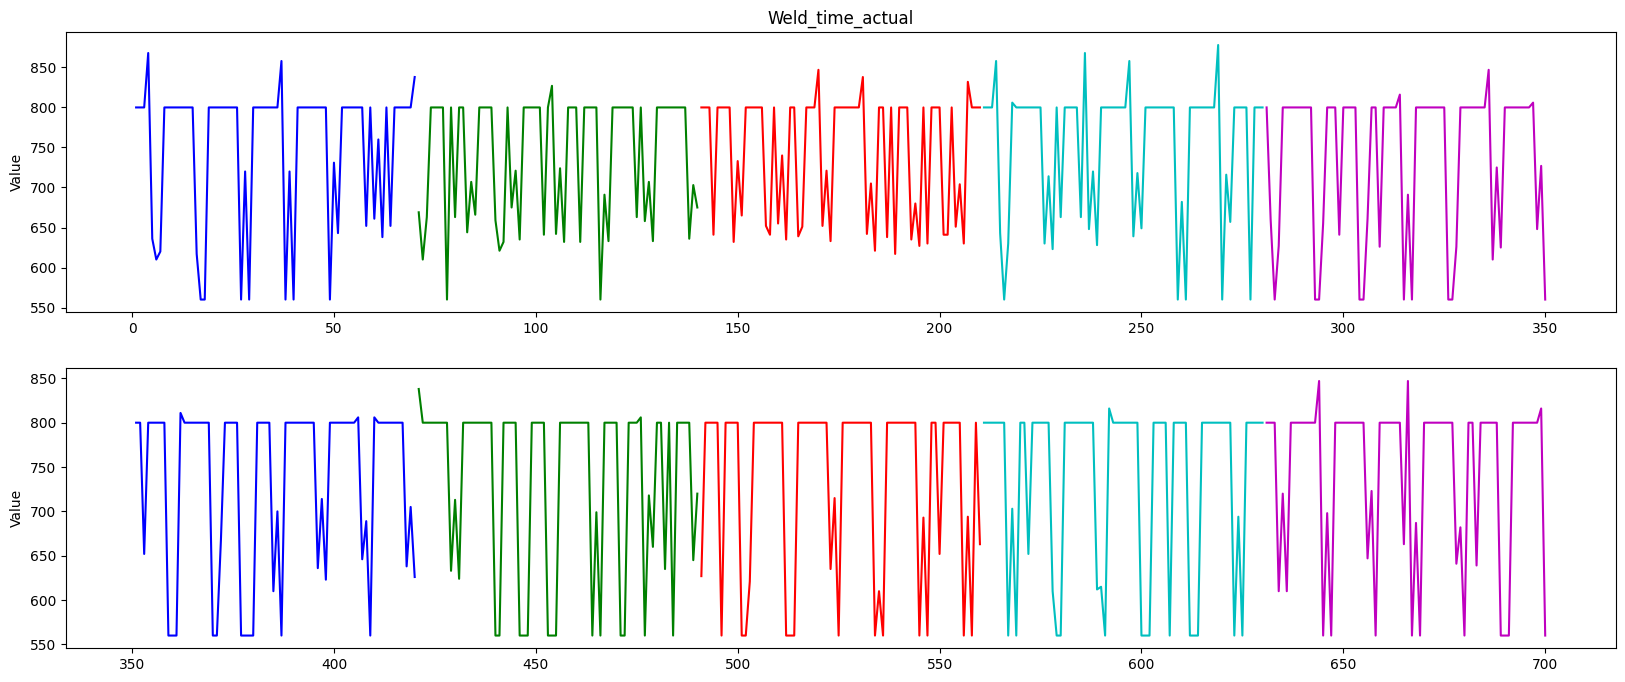

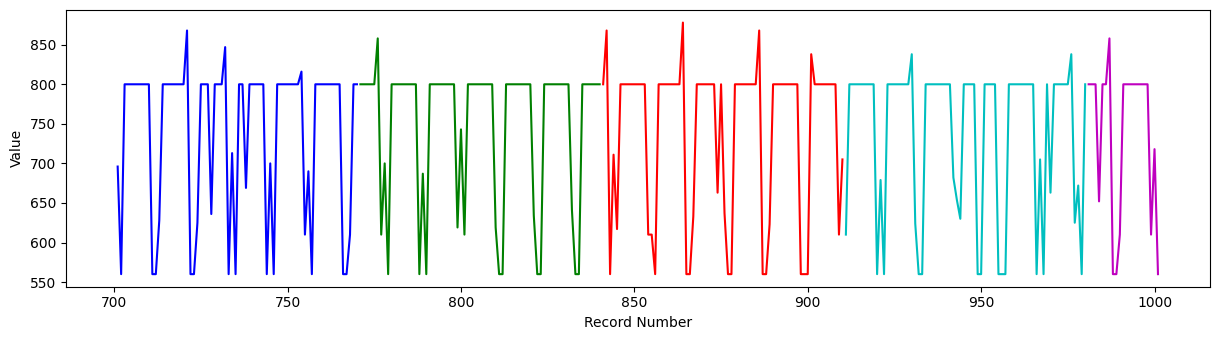

In [ ]:
a = 'Weld_time_actual'

fig, axes = plt.subplots(2, 1, figsize=(20, 8))

subset0 = df.iloc[0:350]
subset1 = df.iloc[350:700]
subset2 = df.iloc[700:]

for i, color in enumerate(['b', 'g', 'r', 'c', 'm', 'y', 'k']):
    subset0_slice = subset0.iloc[i * 70:(i + 1) * 70]
    axes[0].plot(subset0_slice.index, subset0_slice[a], color=color)

axes[0].set_ylabel('Value')
axes[0].set_title(a)

for i, color in enumerate(['b', 'g', 'r', 'c', 'm', 'y', 'k']):
    subset1_slice = subset1.iloc[i * 70:(i + 1) * 70]
    axes[1].plot(subset1_slice.index, subset1_slice[a], color=color)

axes[1].set_ylabel('Value')
fig2, ax2 = plt.subplots(figsize=(12.3, 3.5))
for i, color in enumerate(['b', 'g', 'r', 'c', 'm', 'y', 'k']):
    subset2_slice = subset2.iloc[i * 70:(i + 1) * 70]
    ax2.plot(subset2_slice.index, subset2_slice[a], color=color)

ax2.set_xlabel('Record Number')
ax2.set_ylabel('Value')
plt.tight_layout()
plt.show()

In [ ]:
# column_name = ['Resistance_actual','Voltage_actual','Current_actual','Weld_time_actual']
# for i in range(len(column_name)):

#   column_data = df[column_name[i]].values

#   fft_result = np.fft.fft(column_data)
#   frequencies = np.fft.fftfreq(len(column_data))

#   negative_frequencies = frequencies[frequencies < 0]
#   negative_fft = fft_result[frequencies < 0]
#   positive_frequencies = frequencies[frequencies > 0]
#   positive_fft = fft_result[frequencies > 0]

#   plt.figure(figsize=(14, 6))

#   plt.subplot(121)
#   plt.plot(negative_frequencies, np.abs(negative_fft))
#   plt.title('Negative Frequencies  '+column_name[i])
#   plt.xlabel('Frequency (Hz)')
#   plt.ylabel('Magnitude')
#   plt.grid(True)

#   plt.subplot(122)
#   plt.plot(positive_frequencies, np.abs(positive_fft))
#   plt.title('Positive Frequencies  '+column_name[i])
#   plt.xlabel('Frequency (Hz)')
#   plt.ylabel('Magnitude')
#   plt.grid(True)

#   plt.tight_layout()
#   plt.show()